In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from functools import reduce
import pandas_datareader as web
import seaborn as sns
sns.set()

C:\Users\chris\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
today = date.today()

#Select securities
Securities = ['AMD', 'NVDA', 'MSFT', 'BABA', '^GSPC', 'AMZN', 'GOOG', 'AAPL', '^NDX'
           ]
#Choose time frame for data set
df = web.DataReader(Securities, data_source='yahoo', start='2015-01-01', end=today)
df

Attributes  Adj Close                                                   \
Symbols           AMD        NVDA        MSFT        BABA        ^GSPC   
Date                                                                     
2015-01-02   2.670000   19.395155   41.864841  103.599998  2058.199951   
2015-01-05   2.660000   19.067572   41.479866  101.000000  2020.579956   
2015-01-06   2.630000   18.489475   40.871037  103.320000  2002.609985   
2015-01-07   2.580000   18.441298   41.390320  102.129997  2025.900024   
2015-01-08   2.610000   19.135012   42.607944  105.029999  2062.139893   
...               ...         ...         ...         ...          ...   
2020-05-04  52.560001  291.290009  178.839996  191.149994  2842.739990   
2020-05-05  52.189999  293.739990  180.759995  195.020004  2868.439941   
2020-05-06  52.160000  297.790009  182.539993  195.169998  2848.419922   
2020-05-07  51.950001  304.869995  183.600006  196.490005  2881.189941   
2020-05-08  53.189999  312.500000  184.679993  201.190002  2929.800049   

Attributes                                                         Close  ...  \
Symbols            AMZN         GOOG        AAPL         ^NDX        AMD  ...   
Date                                                                      ...   
2015-01-02   308.519989   523.373108   99.945885  4230.240234   2.670000  ...   
2015-01-05   302.190002   512.463013   97.130241  4160.959961   2.660000  ...   
2015-01-06   295.290009   500.585632   97.139420  4110.830078   2.630000  ...   
2015-01-07   298.420013   499.727997   98.501518  4160.000000   2.580000  ...   
2015-01-08   300.459991   501.303680  102.286186  4240.549805   2.610000  ...   
...                 ...          ...         ...          ...        ...  ...   
2020-05-04  2315.989990  1326.800049  292.368561  8834.110352  52.560001  ...   
2020-05-05  2317.800049  1351.109985  296.756683  8930.620117  52.189999  ...   
2020-05-06  2351.260010  1347.300049  299.818390  8984.860352  52.160000  ...   
2020-05-07  2367.610107  1372.560059  302.919983  9101.879883  51.950001  ...   
2020-05-08  2379.610107  1388.369995  310.130005  9220.349609  53.189999  ...   

Attributes         Open      Volume                                     \
Symbols            ^NDX         AMD       NVDA        MSFT        BABA   
Date                                                                     
2015-01-02  4258.600098         0.0  2842000.0  27913900.0  12303400.0   
2015-01-05  4206.549805   8878200.0  4948800.0  39673900.0  18337000.0   
2015-01-06  4174.779785  13912500.0  4944100.0  36447900.0  15720400.0   
2015-01-07  4139.850098  12377600.0  8045200.0  29114100.0  11052200.0   
2015-01-08  4195.490234  11136600.0  7094500.0  29645200.0  12942100.0   
...                 ...         ...        ...         ...         ...   
2020-05-04  8683.940430  62590600.0  7938900.0  30372900.0  25709400.0   
2020-05-05  8922.389648  56560500.0  9222400.0  36839200.0  22957200.0   
2020-05-06  8997.019531  48138100.0  8086600.0  32139300.0  18598900.0   
2020-05-07  9104.669922  48956600.0  9343300.0  28316000.0  16164600.0   
2020-05-08  9165.700195  40686100.0  8480400.0  30877800.0  23819700.0   

Attributes                                                                
Symbols            ^GSPC       AMZN       GOOG        AAPL          ^NDX  
Date                                                                      
2015-01-02  2.708700e+09  2783200.0  1447500.0  53204600.0  1.435150e+09  
2015-01-05  3.799120e+09  2774200.0  2059800.0  64285500.0  1.794470e+09  
2015-01-06  4.460110e+09  3519000.0  2899900.0  65797100.0  2.167320e+09  
2015-01-07  3.805480e+09  2640300.0  2065000.0  40105900.0  1.957950e+09  
2015-01-08  3.934010e+09  3088400.0  3353500.0  59364500.0  2.105450e+09  
...                  ...        ...        ...         ...           ...  
2020-05-04  4.723140e+09  4865900.0  1504000.0  33392000.0  3.422150e+09  
2020-05-05  5.129590e+09  3242500.0  1651

In [3]:
Close = df['Close']
Close

Symbols,AMD,NVDA,MSFT,BABA,^GSPC,AMZN,GOOG,AAPL,^NDX
Date,,,,,,,,,
2015-01-02,2.670000,20.129999,46.759998,103.599998,2058.199951,308.519989,523.373108,109.330002,4230.240234
2015-01-05,2.660000,19.790001,46.330002,101.000000,2020.579956,302.190002,512.463013,106.250000,4160.959961
2015-01-06,2.630000,19.190001,45.650002,103.320000,2002.609985,295.290009,500.585632,106.260002,4110.830078
2015-01-07,2.580000,19.139999,46.230000,102.129997,2025.900024,298.420013,499.727997,107.750000,4160.000000
2015-01-08,2.610000,19.860001,47.590000,105.029999,2062.139893,300.459991,501.303680,111.889999,4240.549805
...,...,...,...,...,...,...,...,...,...
2020-05-04,52.560001,291.290009,178.839996,191.149994,2842.739990,2315.989990,1326.800049,293.160004,8834.110352
2020-05-05,52.189999,293.739990,180.759995,195.020004,2868.439941,2317.800049,1351.109985,297.559998,8930.620117
2020-05-06,52.160000,297.790009,182.539993,195.169998,2848.419922,2351.260010,1347.300049,300.630005,8984.860352


In [4]:
returns = Close.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [5]:
mean_daily_returns *252

Symbols
AMD      0.764519
NVDA     0.618642
MSFT     0.295420
BABA     0.176425
^GSPC    0.083520
AMZN     0.428992
GOOG     0.218452
AAPL     0.236161
^NDX     0.168584
dtype: float64

In [6]:
volatilities * 252

Symbols
AMD      10.302289
NVDA      7.301320
MSFT      4.387854
BABA      5.132981
^GSPC     2.953653
AMZN      4.854198
GOOG      4.258754
AAPL      4.536031
^NDX      3.373351
dtype: float64

In [9]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

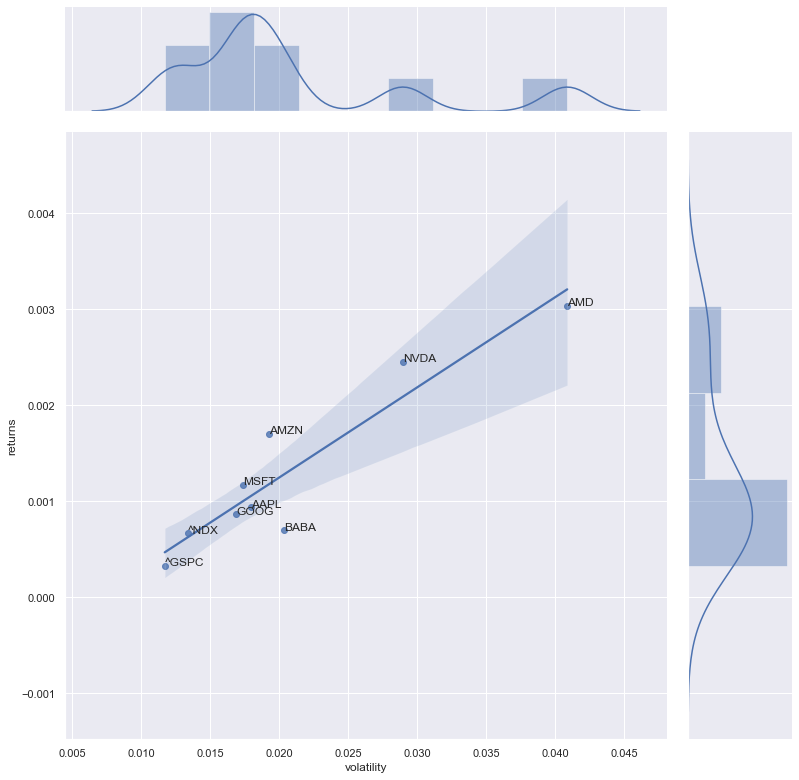

In [10]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=11)

for i in range(combine.shape[0]):
    plt.annotate(Securities[i], (combine.iloc[i, 1], combine.iloc[i, 0]))

plt.show()